In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("mushrooms.csv")

# One-hot encode categorical features
X = pd.get_dummies(df.drop("class", axis=1))
y = df["class"].map({"e": 0, "p": 1})

# Train decision tree with info gain
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X, y)

# Show top features by information gain
importances = pd.Series(clf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))


odor_n                        0.529272
bruises_f                     0.219890
stalk-root_c                  0.065837
spore-print-color_r           0.048119
habitat_d                     0.048087
stalk-root_r                  0.047305
stalk-surface-below-ring_y    0.028979
population_y                  0.005955
cap-surface_g                 0.004521
gill-size_b                   0.002035
dtype: float64


In [2]:
from sklearn import tree
import pandas as pd

# Access tree structure
t = clf.tree_

for i in range(t.node_count):
    if t.feature[i] != tree._tree.TREE_UNDEFINED:  # not a leaf
        feature_name = X.columns[t.feature[i]]
        threshold = t.threshold[i]
        print(
            f"Node {i}: feature={feature_name}, threshold={threshold}, samples={t.n_node_samples[i]}"
        )
    else:
        print(f"Leaf Node {i}: samples={t.n_node_samples[i]}")

Node 0: feature=odor_n, threshold=0.5, samples=8124
Node 1: feature=bruises_f, threshold=0.5, samples=4596
Node 2: feature=stalk-root_c, threshold=0.5, samples=1344
Node 3: feature=stalk-root_r, threshold=0.5, samples=832
Node 4: feature=habitat_d, threshold=0.5, samples=640
Leaf Node 5: samples=544
Leaf Node 6: samples=96
Leaf Node 7: samples=192
Leaf Node 8: samples=512
Leaf Node 9: samples=3252
Node 10: feature=spore-print-color_r, threshold=0.5, samples=3528
Node 11: feature=stalk-surface-below-ring_y, threshold=0.5, samples=3456
Node 12: feature=cap-surface_g, threshold=0.5, samples=3400
Node 13: feature=gill-size_b, threshold=0.5, samples=3396
Node 14: feature=bruises_f, threshold=0.5, samples=196
Leaf Node 15: samples=4
Leaf Node 16: samples=192
Leaf Node 17: samples=3200
Leaf Node 18: samples=4
Node 19: feature=population_y, threshold=0.5, samples=56
Leaf Node 20: samples=40
Leaf Node 21: samples=16
Leaf Node 22: samples=72


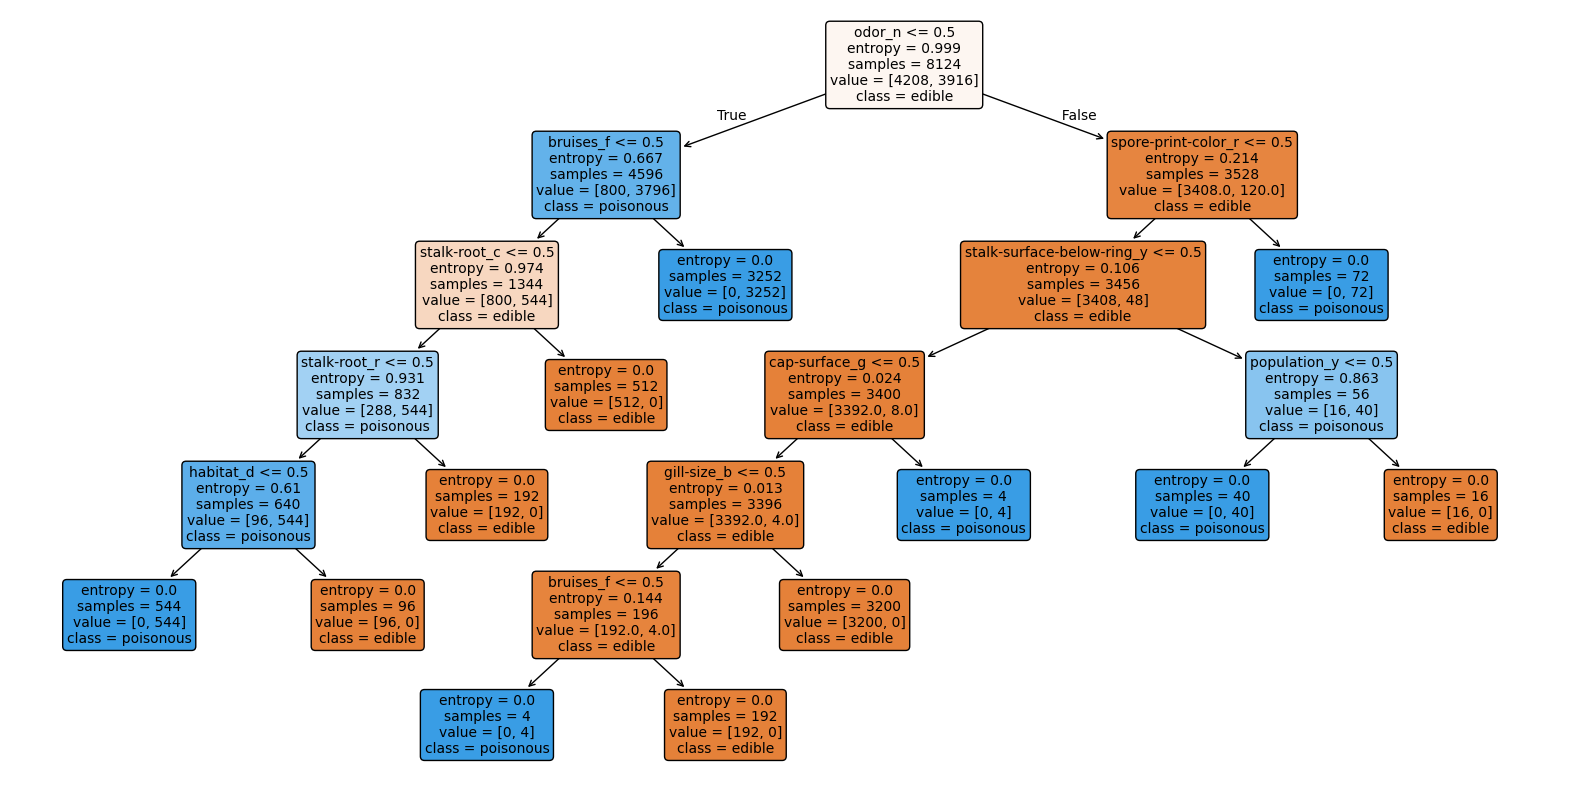

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["edible", "poisonous"],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.show()
